## Customer Segmentation using K-Means Algorithm
by Wolfgang May Panca Angga Adi Purna

In [7]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn import preprocessing

### Data Preprocessing

In [2]:
# Import Dataset
# Customers dataset
url = 'https://drive.google.com/file/d/18Xz9KswZaMuE0sr90PDU62huvM9n6Jdd/view?usp=sharing'
file_id = url.split("/")[-2]
read_url = "https://drive.google.com/uc?id=" + file_id
df_cust = pd.read_csv(read_url)

# Geolocation dataset
url = 'https://drive.google.com/file/d/1y1WIXnHPsBMXrLThmfI9loxx9Wmj4u3H/view?usp=sharing'
file_id = url.split("/")[-2]
read_url = "https://drive.google.com/uc?id=" + file_id
df_geo = pd.read_csv(read_url)

# Order items dataset 
url = 'https://drive.google.com/file/d/1iwp1UqYUi6fQU4UVnw-hrhil2aGRKY5n/view?usp=sharing'
file_id = url.split("/")[-2]
read_url = "https://drive.google.com/uc?id=" + file_id
df_order_items = pd.read_csv(read_url)

# Order payments dataset 
url = 'https://drive.google.com/file/d/1A0GvK_TpfMq4EcfL5I9EkyxAcFxW-Pab/view?usp=sharing'
file_id = url.split("/")[-2]
read_url = "https://drive.google.com/uc?id=" + file_id
df_order_payments = pd.read_csv(read_url)

# Order reviews dataset 
url = 'https://drive.google.com/file/d/1InDHJFl5S7z_p5IwYcSO8K7h69Ll-hRI/view?usp=sharing'
file_id = url.split("/")[-2]
read_url = "https://drive.google.com/uc?id=" + file_id
df_order_reviews = pd.read_csv(read_url)

# Orders dataset 
url = 'https://drive.google.com/file/d/1YVVpwk-3yz31gAAUF1h_2FMOnRrTSLZi/view?usp=sharing'
file_id = url.split("/")[-2]
read_url = "https://drive.google.com/uc?id=" + file_id
df_orders = pd.read_csv(read_url)

# Product category name translation dataset 
url = 'https://drive.google.com/file/d/1Jx5-Y4lEQtnwCUzdmTUOPdy0AO9RJe7H/view?usp=sharing'
file_id = url.split("/")[-2]
read_url = "https://drive.google.com/uc?id=" + file_id
df_prod_names = pd.read_csv(read_url)

# Products dataset 
url = 'https://drive.google.com/file/d/106ETFTrUh79e-PSNiG8W_NtJ5kvre9np/view?usp=sharing'
file_id = url.split("/")[-2]
read_url = "https://drive.google.com/uc?id=" + file_id
df_prod = pd.read_csv(read_url)

# Sellers dataset 
url = 'https://drive.google.com/file/d/1SvjWZwLkMYpmbnqMFADAosaosjyxZP52/view?usp=sharing'
file_id = url.split("/")[-2]
read_url = "https://drive.google.com/uc?id=" + file_id
df_sellers = pd.read_csv(read_url)

In [3]:
# Check total missing values in each datasets
df_names = ['df_cust', 'df_geo', 'df_order_items', 'df_order_payments', 'df_order_reviews', 'df_orders', 'df_prod_names', 'df_prod', 'df_sellers']
df_list = [df_cust, df_geo, df_order_items, df_order_payments, df_order_reviews, df_orders, df_prod_names, df_prod, df_sellers]

num_na = []
for i in range(9):
    na = df_list[i].isnull().sum().sum()
    num_na.append(na)

pd.DataFrame(list(zip(df_names, num_na)), columns = ['Dataset', 'Total Missing Value'])

,Dataset,Total Missing Value
0,df_cust,0
1,df_geo,0
2,df_order_items,0
3,df_order_payments,0
4,df_order_reviews,145903
5,df_orders,4908
6,df_prod_names,0
7,df_prod,2448
8,df_sellers,0


Based on the table above, could be known that there are missing values on 'df_order_reviews', 'df_orders', and 'df_prod' datasets. To avoid the missing values effects on the analysis, each rows that contain missing value(s) will be removed from the datasets.

In [32]:
# Drop rows that contains missing value(s) in each datasets
for i in range(9):
    df_list[i].dropna(inplace = True)
    
# Check datasets still contain missing values or not
num_na = []
for i in range(9):
    na = df_list[i].isnull().sum().sum()
    num_na.append(na)

pd.DataFrame(list(zip(df_names, num_na)), columns = ['Dataset', 'Total Missing Value'])

,Dataset,Total Missing Value
0,df_cust,0
1,df_geo,0
2,df_order_items,0
3,df_order_payments,0
4,df_order_reviews,0
5,df_orders,0
6,df_prod_names,0
7,df_prod,0
8,df_sellers,0


Based on the table above, we know that there aren't missing values anymore in each datasets.

In [5]:
# Combine datasets into a dataframe
main_df = pd.merge(df_cust, df_orders)
main_df = pd.merge(main_df, df_order_items)
main_df = pd.merge(main_df, df_prod)
main_df = pd.merge(main_df, df_prod_names)
main_df = pd.merge(main_df, df_order_payments)
main_df = pd.merge(main_df, df_order_reviews)
main_df = pd.merge(main_df, df_sellers)

In [6]:
# Check Overview of merged dataset
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 0 to 11577
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    11578 non-null  object 
 1   customer_unique_id             11578 non-null  object 
 2   customer_zip_code_prefix       11578 non-null  int64  
 3   customer_city                  11578 non-null  object 
 4   customer_state                 11578 non-null  object 
 5   order_id                       11578 non-null  object 
 6   order_status                   11578 non-null  object 
 7   order_purchase_timestamp       11578 non-null  object 
 8   order_approved_at              11578 non-null  object 
 9   order_delivered_carrier_date   11578 non-null  object 
 10  order_delivered_customer_date  11578 non-null  object 
 11  order_estimated_delivery_date  11578 non-null  object 
 12  order_item_id                  11578 non-null 

Based on the information above, the merged dataset has dimension 11577 x 40. There aren't missing values on the merged dataset. However, the datetime-based columns are not in the correct data type.

In [33]:
# Convert several columns into datetime type
time_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
             'order_estimated_delivery_date', 'shipping_limit_date', 'review_creation_date', 'review_answer_timestamp']
main_df[time_cols] = main_df[time_cols].apply(pd.to_datetime)
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 0 to 11577
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    11578 non-null  object        
 1   customer_unique_id             11578 non-null  object        
 2   customer_zip_code_prefix       11578 non-null  int64         
 3   customer_city                  11578 non-null  object        
 4   customer_state                 11578 non-null  object        
 5   order_id                       11578 non-null  object        
 6   order_status                   11578 non-null  object        
 7   order_purchase_timestamp       11578 non-null  datetime64[ns]
 8   order_approved_at              11578 non-null  datetime64[ns]
 9   order_delivered_carrier_date   11578 non-null  datetime64[ns]
 10  order_delivered_customer_date  11578 non-null  datetime64[ns]
 11  order_estimated

### Clustering Analysis: Customers Segmentation

#### Data Preprocessing for Clustering Analysis

In [34]:
# Get the last purchase date were made by customers
last_purchase_date = main_df.order_purchase_timestamp.max()
last_purchase_date

Timestamp('2018-08-29 14:18:28')

In [36]:
# Assume the present date is the first date of the next month of customers last purchase date
present_date = datetime(2018, 9, 1)
present_date

datetime.datetime(2018, 9, 1, 0, 0)

In [11]:
# Prepare the dataset for customers segmentation
df_clustering = main_df.groupby('customer_unique_id').agg({'customer_state': lambda x: x.max(),
                                                           'payment_value': lambda x: x.sum(),
                                                           'order_id': lambda x: len(x),
                                                           'order_purchase_timestamp': lambda x: (present_date - x.max()).days})

df_clustering.columns = ['State', 'Total_Payment', 'Order_Frequency', 'Order_Recency']
print(df_clustering.info())
df_clustering

<class 'pandas.core.frame.DataFrame'>
Index: 9333 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffff5962728ec6157033ef9805bacc48
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State            9333 non-null   object 
 1   Total_Payment    9333 non-null   float64
 2   Order_Frequency  9333 non-null   int64  
 3   Order_Recency    9333 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 364.6+ KB
None


,State,Total_Payment,Order_Frequency,Order_Recency
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,SP,141.90,1,113
000ec5bff359e1c0ad76a81a45cb598f,SP,27.75,1,10
00172711b30d52eea8b313a7f2cced02,BA,122.07,1,34
001928b561575b2821c92254a2327d06,SP,329.62,2,7
0019e8c501c85848ac0966d45226fa1d,MT,197.27,1,122
...,...,...,...,...
ffeb904468642a1ce663a322629801cb,MG,93.11,1,65
ffecceca389973ef16660d58696f281e,SP,72.76,1,128
fff2ae16b99c6f3c785f0e052f2a9cfb,RJ,200.90,1,133


For clustering analysis, a dataset is created using informations from the merged dataset. The dataset contains location, total payment, order frequency, and order recency for each customers. The number of customers are 9333. The dataset have no missing values.

##### EDA of Clustering Dataset

       Total_Payment  Order_Frequency  Order_Recency
count    9333.000000      9333.000000    9333.000000
mean      245.638111         1.240544      75.423551
std       641.607276         0.723361      42.535458
min        13.890000         1.000000       2.000000
25%        68.180000         1.000000      37.000000
50%       122.420000         1.000000      75.000000
75%       217.550000         1.000000     113.000000
max     29099.520000        13.000000     484.000000


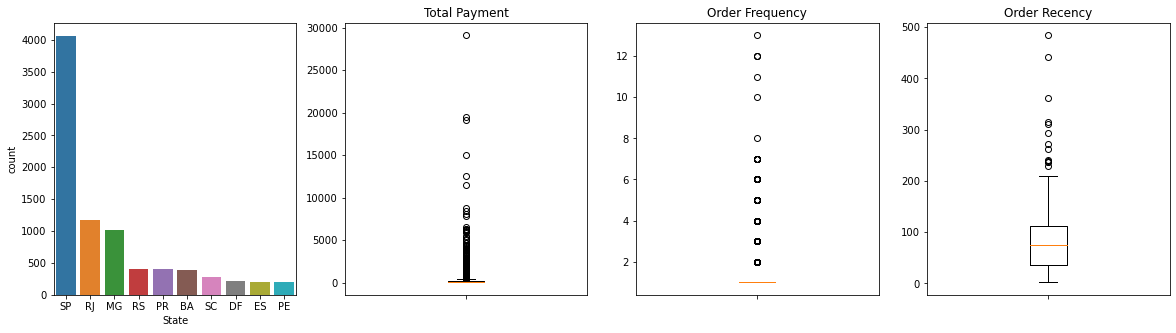

In [12]:
# Visualisation for each columns
print(df_clustering.describe())

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize=(20, 5))

sns.countplot(x = df_clustering['State'], order=pd.value_counts(df_clustering['State']).iloc[:10].index, ax = ax[0])
ax[1].boxplot(x = df_clustering['Total_Payment'], whis=1.5)
ax[2].boxplot(x = df_clustering['Order_Frequency'], whis=1.5)
ax[3].boxplot(x = df_clustering['Order_Recency'], whis=1.5)
ax[1].set(title = 'Total Payment', xticklabels=[])
ax[2].set(title = 'Order Frequency', xticklabels=[])
ax[3].set(title = 'Order Recency', xticklabels=[])

plt.show()

From the visualisation analysis above, could be known that most of the customers live in SP, RJ and MG state. About 75% of the customers have total payment below 220 and order frequency of 1, they can be considered as new customer. About 25% of the customers have recently made a transaction in the last 37 days.

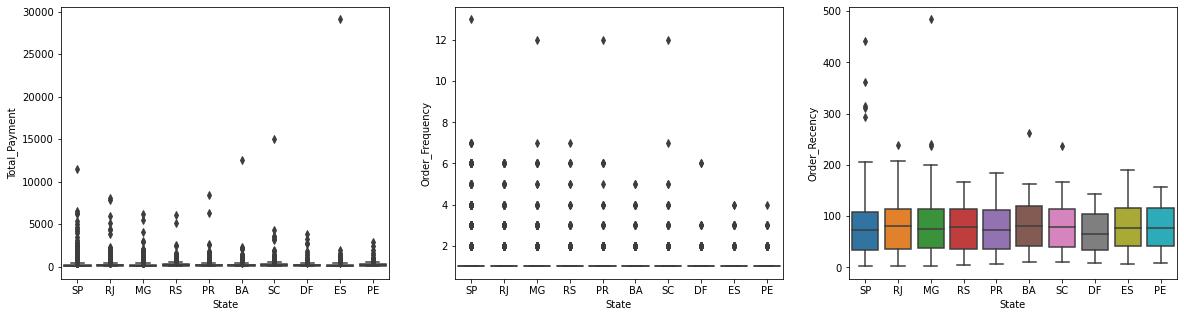

In [13]:
# Visualisation between customer location and others variables
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

sns.boxplot(data = df_clustering, x = 'State', y = 'Total_Payment', order = pd.value_counts(df_clustering['State']).iloc[:10].index, ax = ax[0], whis=1.5)
sns.boxplot(data = df_clustering, x = 'State', y = 'Order_Frequency', order = pd.value_counts(df_clustering['State']).iloc[:10].index, ax = ax[1], whis=1.5)
sns.boxplot(data = df_clustering, x = 'State', y = 'Order_Recency', order = pd.value_counts(df_clustering['State']).iloc[:10].index, ax = ax[2], whis=1.5)

plt.show()

In this visualisation, the visualisations only use top 10 state that have the most customers assuming its can represent other states. From the plots above, could be known that total payment, order frequency and order recency have the same pattern in all of the states. Therefore, 'State' variable is not informative to be used on customer segmentation.

##### Clustering using K-Means Algorithm

Before do clustering using K-Means algorithm, each columns in the dataset should be scaled to create same scale data. The scaling process is needed because K-Means algorithm use distance-based dissimilarity measure. Besides, the scaling process can solve outliers problem.

In [23]:
# Scaling dataset
df = df_clustering.drop(['State'], axis = 1)
scaler = preprocessing.MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = ['Total_Payment', 'Order_Frequency', 'Order_Recency'])
df

,Total_Payment,Order_Frequency,Order_Recency
0,0.004401,0.000000,0.230290
1,0.000477,0.000000,0.016598
2,0.003719,0.000000,0.066390
3,0.010855,0.083333,0.010373
4,0.006305,0.000000,0.248963
...,...,...,...
9328,0.002724,0.000000,0.130705
9329,0.002024,0.000000,0.261411
9330,0.006430,0.000000,0.271784
9331,0.002359,0.000000,0.082988


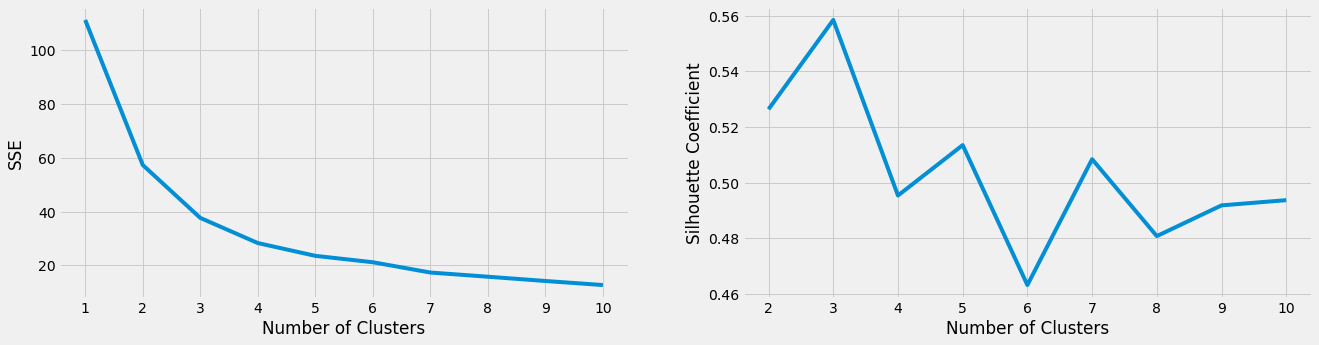

In [31]:
# Find the best number of clusters
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

# Elbow Method
from sklearn.cluster import KMeans
sse = []
for k in range(1, 11):
    kmeans = KMeans(init = 'random', n_clusters = k, n_init = 10, max_iter = 300, random_state = 123)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)
    
plt.style.use("fivethirtyeight")
ax[0].plot(range(1, 11), sse)
ax[0].xaxis.set(ticks = range(1, 11))
ax[0].set_xlabel("Number of Clusters")
ax[0].set_ylabel("SSE")

# Silhouette Score
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(init = 'random', n_clusters = k, n_init = 10, max_iter = 300, random_state = 123)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.style.use("fivethirtyeight")
ax[1].plot(range(2, 11), silhouette_coefficients)
ax[1].set_xlabel("Number of Clusters")
ax[1].set_ylabel("Silhouette Coefficient")

plt.show()

From the plots above, could be known that the best number of cluster is k = 3 because it is the smallest number of clusters that has small error and highest sillhoutte score. 

##### Customers Segemntation Model

In [46]:
# Model
cust_seg = KMeans(init = 'random', n_clusters = 3, n_init = 10, max_iter = 300, random_state = 123)
cust_seg_model = cust_seg.fit(df)

In [52]:
# Cluster Centers
cluster = ['Cluster 1', 'Cluster 2', 'Cluster 3']
pd.DataFrame(cust_seg_model.cluster_centers_, columns = ['Total Payment', 'Order Frequency', 'Order Recency'], index = cluster)

,Total Payment,Order Frequency,Order Recency
Cluster 1,0.051255,0.257042,0.167150
Cluster 2,0.006419,0.010679,0.228657
Cluster 3,0.006097,0.010669,0.076494


From the table above, customers can be segmented as follows:
- Cluster 1 as Loyal Customers
<br> Customers from this cluster have large transaction payments and make pruchases more often.
- Cluster 2 as At Risk Customers
<br> Customers from this cluster have small transaction payments and have not purchases for a long time.
- Cluster 3 as Active Customers
<br> Customers from this cluster recently make purchases.

##### Segmentation New Customer
- Scaling customer's data using Min-Max Scaling method:
<br> Total Payment
<br> Total Payment_scaled = (Total Payment - 13.89)/(29099.52 - 13.89)
<br> Order Frequency
<br> Order Frequency_scaled = (Order Frequency - 1)/(13 - 1)
<br> Order Recency
<br> Order Recency_scaled = (Order Recency - 2)/(484 - 2)
<br>
<br>
- Calculate distance measure for clustering:
<br> distance = sqrt((Total Payment_scaled - Total Payment_centroid cluster i)^2 + (Order Frequency_scaled - Order Frequency_centroid cluster i)^2 + (Order Recency_scaled - Order Recency_centroid cluster i)^2)
<br> for i : cluster 1, cluster 2, cluster 3
<br>
<br> The above formula is applied to each clusters. 
<br> Then get distance of new customer to each clusters and find the smallest ones. The smallest distance is the cluster for the new customer.